In [2]:
from h5py import File
from pyproj import Proj
from netCDF4 import Dataset

In [174]:
file = r"C:\Users\Sonu\Downloads\3DIMG_03JUL2022_0630_L2C_INS_V01R00.h5"
# file = r"C:\Users\Sonu\Downloads\3DIMG_17JUL2023_0630_L2C_INS_V01R00.h5"

In [202]:
fh = File(file, "r")
x_vals = fh["X"][()]
y_vals = fh["Y"][()]
ghi = np.array(fh["GHI"][()][0, ::, :])
dni=fh["DNI"][()][0, ::, :]
dhi=fh["DHI"][()][0, ::, :]
ins=fh["INS"][()][0, ::, :]
# # print(x_vals)
# #print(x_vals)
# print(ghi)

In [173]:
INSAT_PROJECTION = Proj(
    "+proj=merc +lon_0=75.0 +k=1 +x_0=0 +y_0=0 +a=6378137 +b=6356752.3142 +lat_ts=17.75 "
    "+ellps=WGS84 +datum=WGS84 +towgs84=0,0,0 +units=m +no_defs"
)

-404062.74245897005 2592752.9247708414
708 702
398.66013


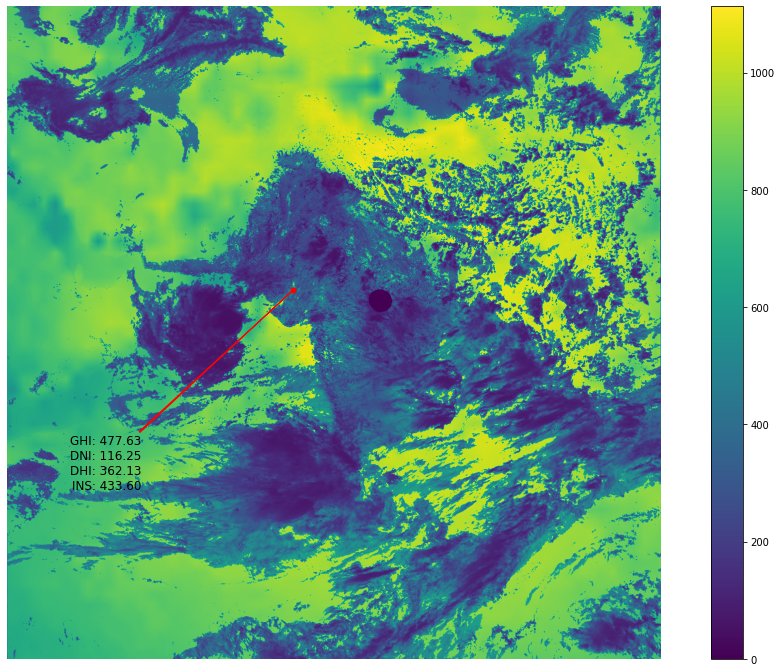

In [203]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

x, y = INSAT_PROJECTION(longitude=71.19, latitude=23.88)
argy = abs(y_vals - y).argmin()
argx = abs(x_vals - x).argmin()
print(x, y)
print(argx, argy)
print(ghi[argx][argy])
fig, ax = plt.subplots(figsize=(18, 12))
image_ghi=ax.imshow(
    ghi,
    extent=(x_vals[0], x_vals[-1], y_vals[-1], y_vals[0]),
    cmap="viridis",
)
cbar = fig.colorbar(image_ghi, ax=ax)
ax.scatter(x_vals[argx],y_vals[argy], c='red', marker='.', s=100)
arrow_text = f'GHI: {ghi[argy][argx]:.2f}\nDNI: {dni[argy][argx]:.2f}\nDHI: {dhi[argy][argx]:.2f}\nINS: {ins[argy][argx]:.2f}'
ax.annotate(
    arrow_text,
    xy=(x_vals[argx], y_vals[argy]),
    xytext=(x_vals[argx]-1500000, y_vals[argy]-2000000),
    arrowprops=dict(arrowstyle='wedge,tail_width=0.1', color='red', lw=1, shrinkA=0, shrinkB=0),ha='right', va='bottom', fontsize=12, color='black')

#plt.savefig(r"C:\Users\Sonu\Desktop\newcolormap.jpeg")
ax.axis('off')
plt.show()